## Importing the required libraries

In [154]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [157]:
# Load the Mall Customer Segmentation dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#Data Preprocessing

In [160]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [162]:
# checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Feature Selection

In [165]:
# Select relevant features: Annual Income and Spending Score
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Display basic statistics for these features
print(X.describe())


       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


## Standardizing the features

In [168]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




## Determining the optimal number of clusters(K value)

In [171]:
wcss = []
silhouette_scores = []

# Trying different numbers of clusters (e.g., from 2 to 10)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    
    wcss.append(kmeans.inertia_)




## Applying K-means clustering

In [174]:
# Assuming the optimal number of clusters is 5 based on the Elbow Method and Silhouette Score
kmeans = KMeans(n_clusters=5,init='k-means++', n_init='auto', random_state=42)
kmeans.fit(X_scaled)

# Assigning the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Displaying the first few rows with the cluster labels
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        3  
2        2  
3        3  
4        2  


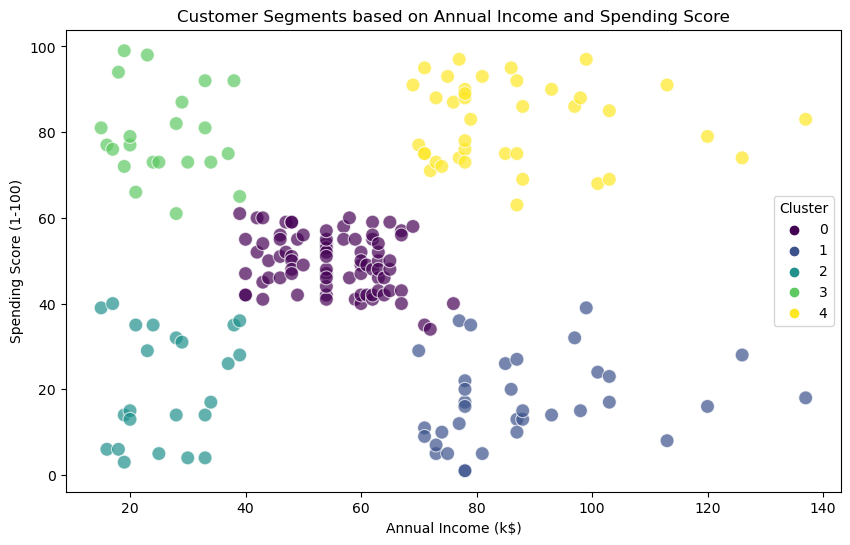

In [176]:
#vizualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [150]:
#Analysis
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analysis)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 88.200000               17.114286
2                 26.304348               20.913043
3                 25.727273               79.363636
4                 86.538462               82.128205
